## Набор библиотек

In [3]:
import numpy as np
import scipy.stats as sts
import matplotlib.pyplot as plt
%matplotlib inline

# Бета-распределение
###### https://ru.wikipedia.org/wiki/%D0%91%D0%B5%D1%82%D0%B0-%D1%80%D0%B0%D1%81%D0%BF%D1%80%D0%B5%D0%B4%D0%B5%D0%BB%D0%B5%D0%BD%D0%B8%D0%B5

#### Генерируем выборки и делаем визуализацию.

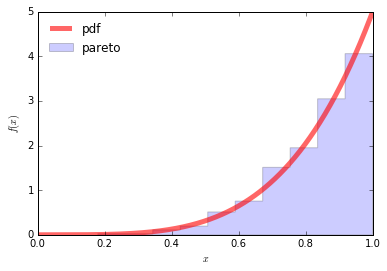

In [4]:
# рисуем
fig, ax = plt.subplots(1, 1)
# параметр распреления
a = 5
b = 1

#
beta = sts.beta(a, b)
# генерация случайного набора
r = beta.rvs(1000)
# выводим на гистограмму на график
ax.hist(r, normed=True, histtype='stepfilled', alpha=0.2, label='pareto')

# функция плотности распределения
x = np.linspace( 0.0001, 0.9999, 1000)
ax.plot(x, beta.pdf(x), 'r-', lw=5, alpha=0.6, label='pdf')

# подпишем оси и легенду
ax.legend(loc='best', frameon=False)
plt.ylabel('$f(x)$')
plt.xlabel('$x$')

# выведем что получилось
plt.show()

### Применяем ЦПТ
#### опишем процедуру вывода, где N-это параметр

In [7]:
def pareto_show( n, cnt ):
    
    # визуализируем
    fig, ax = plt.subplots(1, 1)
    
    # массив для хранения средних
    means = np.array( range(n), dtype='float')
    
    # cnt раз по n
    for i in range(n):
        # генерация n случайных величин и среднее
        means[i] = beta.rvs(size=cnt).mean()
    
    # гистограмма
    ax.hist(means, normed=True, histtype='stepfilled', alpha=0.5, label='Mean on N=%d' % n)

    # считаем значения мат ожидания и стандартного отклонения
    mu = a/float((a+b))
    sigma = np.sqrt( (a*b)/float((((a+b)**2)*(a+b+1))) /n)
    print "mu=%f, sigma=%f, n=%d" % ( mu, sigma, n )
    
    # график плотности нормального распределения
    x = np.linspace( 0.0001, 0.9999, 1000)
    norm = sts.norm(mu, sigma)
    ax.plot(x, norm.pdf(x),'r-', lw=2, alpha=0.5,  label='norm pdf')

    #
    ax.legend(loc='best', frameon=False)
    plt.ylabel('$f(x)$')
    plt.xlabel('$x$')
    #
    plt.show()


#### N = 5

mu=0.833333, sigma=0.062994, n=5


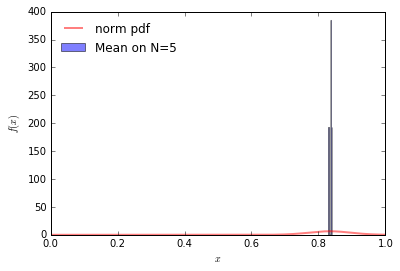

In [8]:
# 
pareto_show( 5, 1000 )

#### N = 50

mu=0.833333, sigma=0.019920, n=50


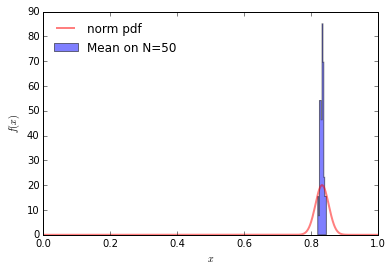

In [276]:
#
pareto_show( 50, 1000 )

#### N = 500

mu=0.833333, sigma=0.006299


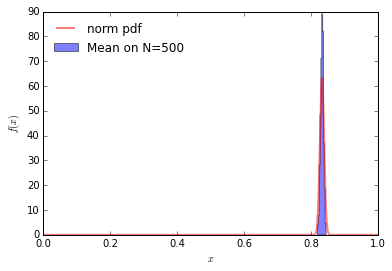

In [273]:
#
pareto_show( 500, 1000 )

## Вывод: ЦПТ работает. 
## Выбрано распредление "скошенное" вправо, поэтому требуется большая выборка усредненных значений, что бы апроксимировать выбранное распределение нормальным.